In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.compose
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [18]:
def load_data(path, partition=0.7):
  # permite cargar train, validation y test data. 
    if path in ('train', 'validation'):
        df = pd.read_csv('https://raw.githubusercontent.com/gonzalomdvc/ml-datasets/master/train.csv')
        train, valid = train_test_split(df, test_size=partition)
    if path == 'train':
        x = train.drop(columns=['Credit_Score'])
        y = train['Credit_Score']
        return x, y
    elif path == 'validation':
        x = valid.drop(columns=['Credit_Score'])
        y = valid['Credit_Score']
        return x, y
    elif path == 'test':
        test = pd.read_csv('https://raw.githubusercontent.com/gonzalomdvc/ml-datasets/master/test.csv')
        return test

# Preprocesamiento

In [19]:
#Type_of_Loan(13) la dropeo, pero se puede hacer un oneHotEncoderManual
drop_columns = [0,1,3,5,13]
column_transformerX = sklearn.compose.ColumnTransformer(transformers=[    
    ("drop", "drop" , [0,1,3,5,13]),  #borramos todas las columnas que no nos aportan ninguna información 
    ("Month", sklearn.preprocessing.StandardScaler() , [2]),  
    ("Age", sklearn.preprocessing.StandardScaler() , [4]),  
    ("Trabajo", sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore') , [6]),#El handle_unknown='ignore' hace que se omita la asignacion de un elemento al encontrar un valor desconocido  
    ("IngresosAnuales", sklearn.preprocessing.StandardScaler() , [7]),  
    ("SalarioMensual", sklearn.preprocessing.StandardScaler() , [8]),  
    ("Num_Bank_Accounts", sklearn.preprocessing.StandardScaler() , [9]),  
    ("Num_Credit_Card", sklearn.preprocessing.StandardScaler() , [10]),  
    ("Interest_Rate", sklearn.preprocessing.RobustScaler() , [11]),  
    ("Num_of_Loan", sklearn.preprocessing.StandardScaler() , [12]),  
    ("Delay_from_due_date", sklearn.preprocessing.StandardScaler() , [14]),  
    ("Num_of_Delayed_Payment", sklearn.preprocessing.StandardScaler() , [15]),  
    ("Changed_Credit_Limit", sklearn.preprocessing.StandardScaler() , [16]),  
    ("Num_Credit_Inquiries", sklearn.preprocessing.StandardScaler() , [17]),  
    ("Credit_Mix", sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore') , [18]),
    ("Outstanding_Debt", sklearn.preprocessing.StandardScaler() , [19]),  
    ("Credit_Utilization_Ratio", sklearn.preprocessing.RobustScaler() , [20]),  
    ("Credit_History_Age", sklearn.preprocessing.StandardScaler() , [21]),  
    ("Payment_of_Min_Amount", sklearn.preprocessing.OneHotEncoder() , [22]),
    ("Total_EMI_per_month", sklearn.preprocessing.StandardScaler() , [23]),  
    ("Amount_invested_monthly", sklearn.preprocessing.StandardScaler() , [24]),  
    ("Payment_Behaviour", sklearn.preprocessing.OneHotEncoder() , [25]),  
    ("Monthly_Balance", sklearn.preprocessing.StandardScaler() , [26]),  
]);

In [20]:
def fit_clf(x, y, classifier, params):
  # implementa knn con key word args
    clf = GridSearchCV(classifier, params, scoring='f1_macro')
    return clf.fit(x, y)

In [21]:
def eval_classifier(classifier, x_valid, y_valid, y_pred):
  # nos da las medidas recall, precision, f1 y una matriz de confusión. En principio vale para cualquier clasificador
    print(classification_report(y_pred, y_valid))
    plot_confusion_matrix(classifier, x_valid, y_valid, display_labels=set(y_valid.values), cmap=plt.cm.Blues)

In [22]:
#provisional: dejar sólo datos numéricos
x, y = load_data('train')
x = pd.DataFrame(column_transformerX.fit_transform(x))
x_valid, y_valid = load_data('validation')
x_valid = pd.DataFrame(column_transformerX.fit_transform(x_valid))

# KNN

In [23]:
knn_params = {
    "n_neighbors": list(range(4, 9)),
    "weights": ['uniform', 'distance'],
}

In [24]:
classifier_knn = fit_clf(x, y, KNeighborsClassifier(), knn_params)
print(classifier_knn.best_params_)

{'n_neighbors': 6, 'weights': 'distance'}


              precision    recall  f1-score   support

        Good       0.73      0.73      0.73      9904
        Poor       0.77      0.81      0.79     15614
    Standard       0.84      0.82      0.83     30482

    accuracy                           0.80     56000
   macro avg       0.78      0.79      0.78     56000
weighted avg       0.80      0.80      0.80     56000



/home/gonzalo/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


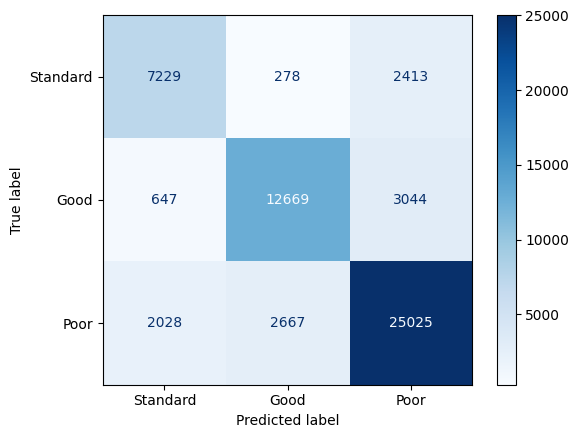

In [25]:
y_pred = classifier_knn.predict(x_valid)
eval_classifier(classifier_knn, x_valid, y_valid, y_pred) 

# SVM

In [26]:
svm_params = {
    "degree": list(range(2, 4)),
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"]
}

In [27]:
classifier_svm = fit_clf(x, y, SVC(), svm_params)
print(classifier_svm.best_params_)

ValueError: X should be a square kernel matrix

In [ ]:
y_pred = classifier_svm.predict(x_valid)
eval_classifier(classifier_svm, x_valid, y_valid, y_pred) 

# Predict on best model

In [ ]:
x_test = load_data('test')
x_ids = x_test['ID'].values
x_test = pd.DataFrame(column_transformerX.fit_transform(x_test))
pred = classifier_1.predict(x_test)
results = pd.DataFrame(list(zip(x_ids, pred)), columns=['ID', 'Credit_Score'])

In [ ]:
results.to_csv('predictions.csv', index=False)